In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings( "ignore")

<b>Problem 1

<b>1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [163]:
df1=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes').drop('Unnamed: 0',axis=1)
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [164]:
df1.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [165]:
df1.shape

(1525, 9)

In [166]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [167]:
df1.isnull().values.any()

False

In [168]:
print('Duplicates:',df1.duplicated().sum())

Duplicates: 8


In [169]:
 df1.drop_duplicates(inplace=True)

In [170]:
print('Duplicates:',df1.duplicated().sum())

Duplicates: 0


In [171]:
df1.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [172]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,NaN,NaN,NaN,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,NaN,NaN,NaN,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,NaN,NaN,NaN,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,NaN,NaN,NaN,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,NaN,NaN,NaN,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,NaN,NaN,NaN,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

In [173]:
cat=[]
num=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print('Categorical columns',cat) 
print('Numerical colunmns',num)

Categorical columns ['vote', 'gender']
Numerical colunmns ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


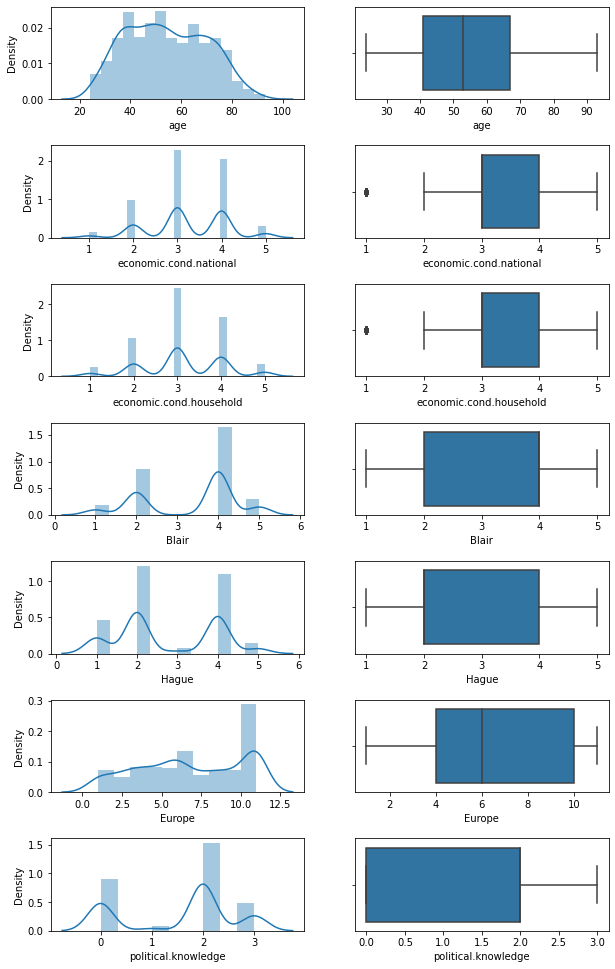

In [174]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,17)

a = sns.distplot(df1['age'] , ax=axes[0][0])
a = sns.boxplot(df1['age'] , orient = "v" , ax=axes[0][1])
plt.subplots_adjust( hspace=0.5 )

a = sns.distplot(df1['economic.cond.national'] , ax=axes[1][0])
a = sns.boxplot(df1['economic.cond.national'] , orient = "v" , ax=axes[1][1])

a = sns.distplot(df1['economic.cond.household'] , ax=axes[2][0])
a = sns.boxplot(df1['economic.cond.household'] , orient = "v" , ax=axes[2][1])

a = sns.distplot(df1['Blair'] , ax=axes[3][0])
a = sns.boxplot(df1['Blair'] , orient = "v" , ax=axes[3][1])

a = sns.distplot(df1['Hague'] , ax=axes[4][0])
a = sns.boxplot(df1['Hague'] , orient = "v" , ax=axes[4][1])

a = sns.distplot(df1['Europe'] , ax=axes[5][0])
a = sns.boxplot(df1['Europe'] , orient = "v" , ax=axes[5][1])

a = sns.distplot(df1['political.knowledge'] , ax=axes[6][0])
a = sns.boxplot(df1['political.knowledge'] , orient = "v" , ax=axes[6][1])

plt.show()

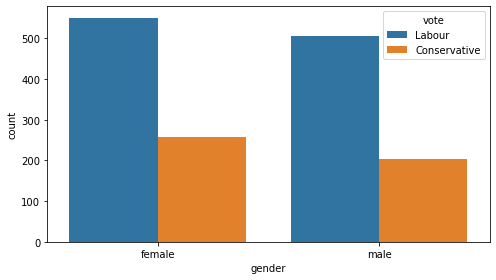

In [175]:
plt.figure(figsize=(7,4));
sns.countplot( data=df1, x='gender', hue='vote');
plt.tight_layout()
plt.show()

Box plot of vote vs age


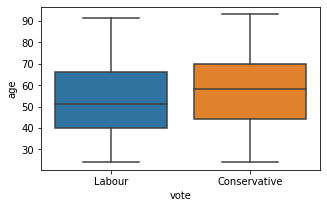

Box plot of vote vs economic.cond.national


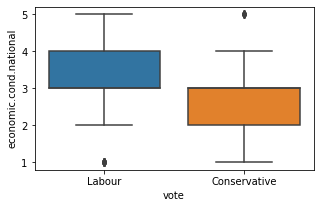

Box plot of vote vs economic.cond.household


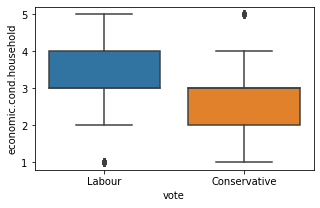

Box plot of vote vs Blair


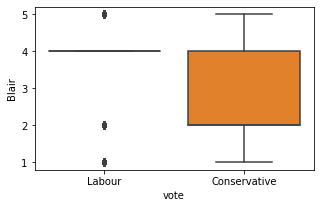

Box plot of vote vs Hague


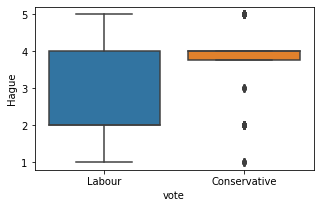

Box plot of vote vs Europe


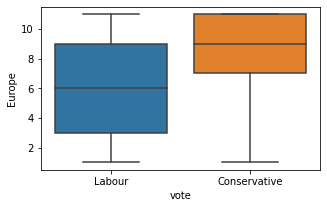

Box plot of vote vs political.knowledge


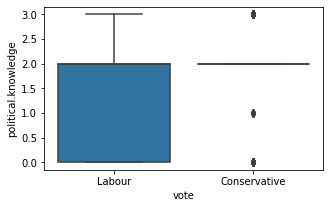

In [176]:
for i in df1.columns:
    if type(df1[i][0]) != str:
        print('Box plot of vote vs {}'.format(i))
        plt.figure(figsize=(5,3)); 
        sns.boxplot(x=df1['vote'],y=df1[i])
        plt.show()
               

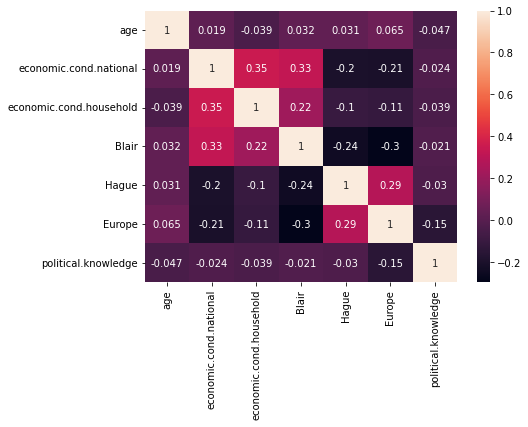

In [177]:
plt.figure(figsize=(7,5));
sns.heatmap(df1.corr(), annot=True);

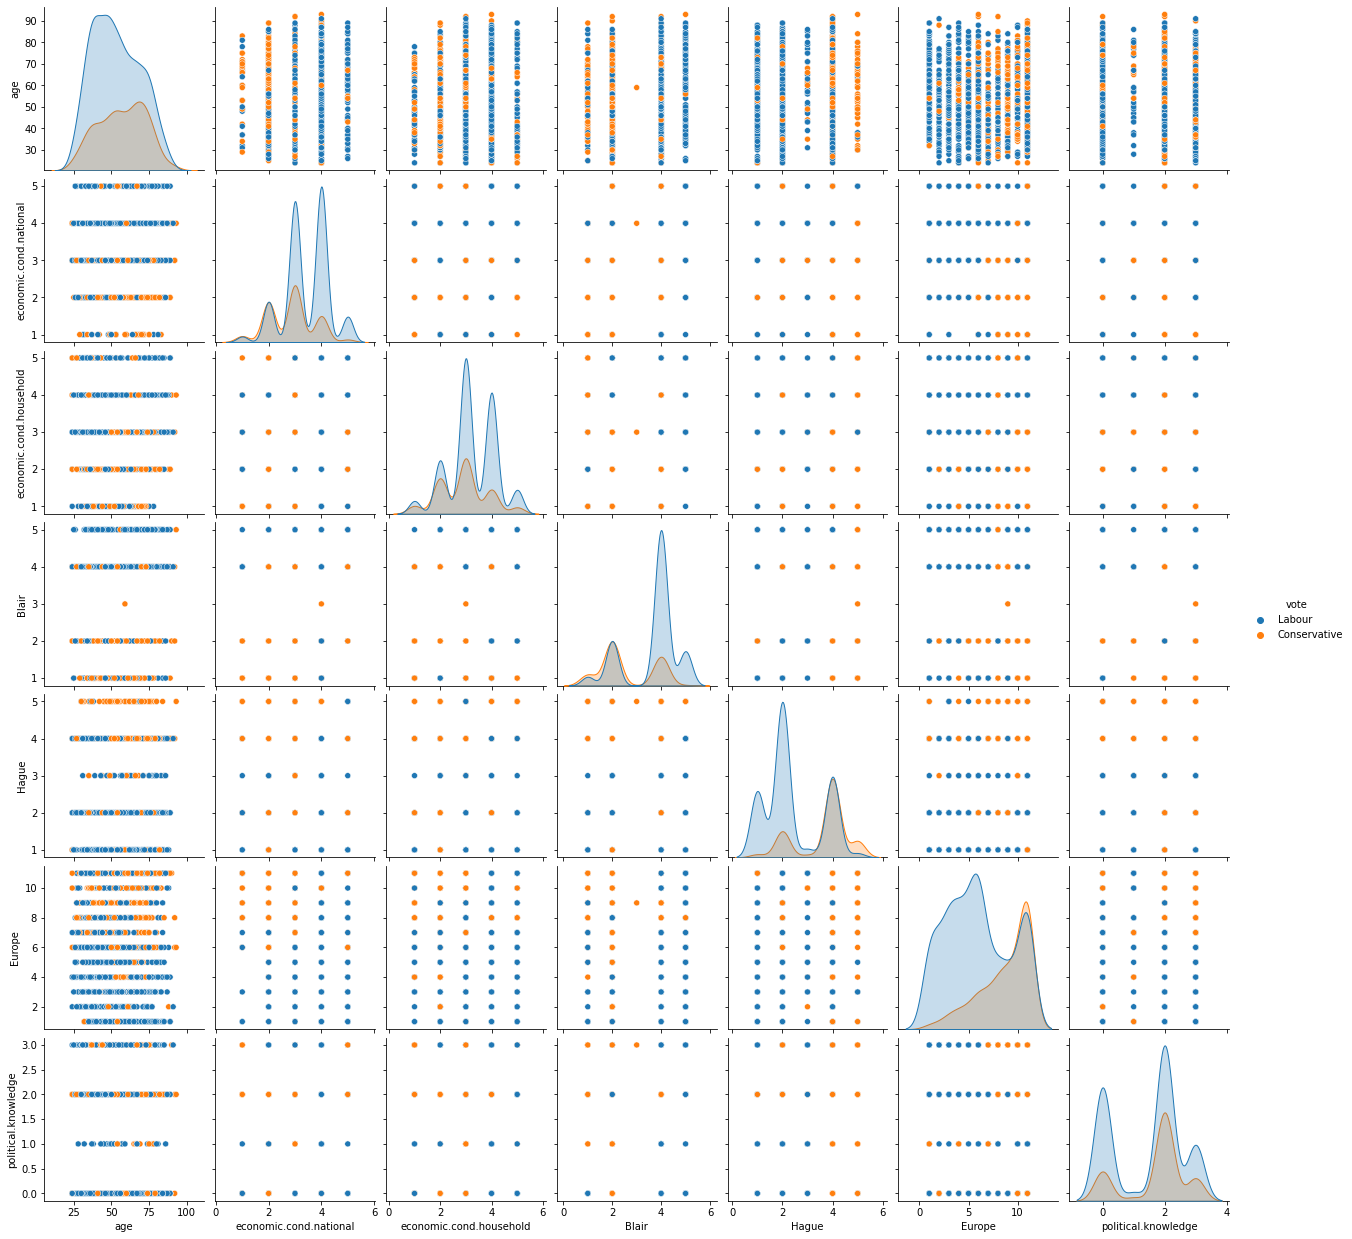

In [16]:
sns.pairplot(df1, hue='vote');
plt.savefig('Pairplot.jpeg')  

<b>1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [178]:
df1 = pd.get_dummies(df1, columns=['gender'],drop_first=True)
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


In [179]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [180]:
df1['vote'] = LE.fit_transform(df1['vote'])
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [181]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender_male,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


In [182]:
from scipy.stats import zscore

In [183]:
df1_scaled = df1.drop(labels= "vote" , axis = 1)

In [184]:
df1_scaled = df1_scaled.apply(zscore)
df1_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,1.917458e-17,1.00033,-1.926617,-0.843577,-0.079079,0.812836,2.469250
economic.cond.national,1517.0,-1.984789e-16,1.00033,-2.547041,-0.278185,-0.278185,0.856242,1.990670
economic.cond.household,1517.0,-2.397189e-16,1.00033,-2.296796,-0.148020,-0.148020,0.926367,2.000755
Blair,1517.0,-1.034842e-16,1.00033,-1.988727,-1.137217,0.565802,0.565802,1.417312
Hague,1517.0,5.386448e-17,1.00033,-1.419969,-0.608329,-0.608329,1.014951,1.826592
Europe,1517.0,6.293947e-17,1.00033,-1.740556,-0.830902,-0.224465,0.988407,1.291625
political.knowledge,1517.0,-7.665442e-16,1.00033,-1.421084,-1.421084,0.423832,0.423832,1.346290
gender_male,1517.0,2.648581e-16,1.00033,-0.936736,-0.936736,-0.936736,1.067536,1.067536


In [189]:
df1_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [190]:
x=df1.drop('vote',axis=1)
y=df1['vote']

In [191]:
x_scaled=df1_scaled
y_scaled=df1['vote']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [193]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.30 , random_state=1)

In [194]:
print('X train head')
print(X_train.head())
print('X test head')
print(X_test.head())
print('\n')
print('Y train head')
print(y_train.head())
print('Y test head')
print(y_test.head())

X train head
      age  economic.cond.national  economic.cond.household  Blair  Hague  \
991    34                       2                        4      1      4   
1274   40                       4                        3      4      4   
649    61                       4                        3      4      4   
677    47                       3                        3      4      2   
538    44                       5                        3      4      2   

      Europe  political.knowledge  gender_male  
991       11                    2            0  
1274       6                    0            1  
649        7                    2            0  
677       11                    0            1  
538        8                    0            1  
X test head
      age  economic.cond.national  economic.cond.household  Blair  Hague  \
504    71                       3                        3      2      2   
369    43                       3                        2      4      2

In [195]:
print('X train scaled head')
print(X_train_scaled.head())
print('X test scaled head')
print(X_test_scaled.head())
print('\n')
print('Y train scaled head')
print(y_train_scaled.head())
print('Y test scaled head')
print(y_test_scaled.head())

X train scaled head
           age  economic.cond.national  economic.cond.household     Blair  \
991  -1.289535               -1.412613                 0.926367 -1.988727   
1274 -0.907286                0.856242                -0.148020  0.565802   
649   0.430587                0.856242                -0.148020  0.565802   
677  -0.461328               -0.278185                -0.148020  0.565802   
538  -0.652453                1.990670                -0.148020  0.565802   

         Hague    Europe  political.knowledge  gender_male  
991   1.014951  1.291625             0.423832    -0.936736  
1274  1.014951 -0.224465            -1.421084     1.067536  
649   1.014951  0.078753             0.423832    -0.936736  
677  -0.608329  1.291625            -1.421084     1.067536  
538  -0.608329  0.381971            -1.421084     1.067536  
X test scaled head
           age  economic.cond.national  economic.cond.household     Blair  \
504   1.067669               -0.278185                -

<b>1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

In [196]:
from sklearn import metrics

<b>Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
modelLr=LogisticRegression(solver='newton-cg',n_jobs=2)
modelLr.fit(X_train,y_train)

LogisticRegression(n_jobs=2, solver='newton-cg')

In [199]:
print('Performance metrics of Logistic Regresssion on train data')
y_train_predict_lr = modelLr.predict(X_train)
model_score = modelLr.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lr))         
print(metrics.classification_report(y_train, y_train_predict_lr))

Performance metrics of Logistic Regresssion on train data
Accuracy: 0.8312912346842601
[[196 111]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [200]:
print('Performance metrics of Logistic Regresssion on test data')
y_test_predict_lr = modelLr.predict(X_test)
model_score = modelLr.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lr))       
print(metrics.classification_report(y_test, y_test_predict_lr)) 

Performance metrics of Logistic Regresssion on test data
Accuracy: 0.8355263157894737
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



<b>LDA

In [201]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [202]:
modelLDA=LinearDiscriminantAnalysis()
modelLDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [203]:
print('Performance metrics of LDA on train data')
y_train_predict_lda = modelLDA.predict(X_train)
model_score = modelLDA.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lda))         
print(metrics.classification_report(y_train, y_train_predict_lda))

Performance metrics of LDA on train data
Accuracy: 0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [204]:
print('Performance metrics of LDA on test data')
y_test_predict_lda = modelLDA.predict(X_test)
model_score = modelLDA.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lda))       
print(metrics.classification_report(y_test, y_test_predict_lda)) 

Performance metrics of LDA on test data
Accuracy: 0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



<b>1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

<b>KNN

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
knn =KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )
knn.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier(weights='distance')

In [207]:
print('Performance metrics of KNN on train data')
y_train_predict_knn = knn.predict(X_train_scaled)
model_score = knn.score(X_train_scaled, y_train_scaled)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_knn))         
print(metrics.classification_report(y_train_scaled, y_train_predict_knn))

Performance metrics of KNN on train data
Accuracy: 1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [208]:
print('Performance metrics of KNN on test data')
y_test_predict_knn = knn.predict(X_test_scaled)
model_score = knn.score(X_test_scaled, y_test_scaled) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_knn))       
print(metrics.classification_report(y_test_scaled, y_test_predict_knn)) 

Performance metrics of KNN on test data
Accuracy: 0.8179824561403509
[[102  51]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       153
           1       0.84      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456



<b>Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB

In [210]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [212]:
print('Performance metrics of Naive Bayes on train data')
y_train_predict_nb = nb.predict(X_train)
model_score = nb.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_nb))         
print(metrics.classification_report(y_train, y_train_predict_nb))

Performance metrics of Naive Bayes on train data
Accuracy: 0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [213]:
print('Performance metrics of Naive Bayes on test data')
y_test_predict_nb = nb.predict(X_test)
model_score = nb.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_nb))       
print(metrics.classification_report(y_test, y_test_predict_nb)) 

Performance metrics of Naive Bayes on test data
Accuracy: 0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



<b>1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. 

<b>Model tuning 

In [234]:
from sklearn.model_selection import GridSearchCV

<b>1. Logistic Regression

In [242]:
grid_lr={'penalty':['l2','none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'n_jobs':[2,-1],
      'tol':[0.0001,0.00001]}

In [243]:
grid_search_lr = GridSearchCV(estimator = modelLr, param_grid = grid_lr)

In [244]:
grid_search_lr.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(n_jobs=2, solver='newton-cg'),
             param_grid={'n_jobs': [2, -1], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]})

In [245]:
print(grid_search_lr.best_params_,'\n')
print(grid_search_lr.best_estimator_)

{'n_jobs': 2, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(n_jobs=2, solver='liblinear')


In [239]:
best_model_lr = grid_search_lr.best_estimator_

In [240]:
print('Performance metrics of Logistic Regresssion after Model Tuning on train data')
y_train_predict_lr1 = best_model_lr.predict(X_train)
model_score = best_model_lr.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lr1))         
print(metrics.classification_report(y_train, y_train_predict_lr1))

Performance metrics of Logistic Regresssion after Model Tuning on train data
Accuracy: 0.8369462770970783
[[198 109]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [241]:
print('Performance metrics of Logistic Regresssion after Model Tuning on test data')
y_test_predict_lr2 = best_model_lr.predict(X_test)
model_score = best_model_lr.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lr2))       
print(metrics.classification_report(y_test, y_test_predict_lr2)) 

Performance metrics of Logistic Regresssion after Model Tuning on test data
Accuracy: 0.8289473684210527
[[110  43]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



<b>LDA

In [262]:
grid_lda={
    'solver' : ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.00001]
         }

In [263]:
grid_search_lda = GridSearchCV(estimator = modelLDA, param_grid = grid_lda)

In [264]:
grid_search_lda.fit(X_train,y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [265]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [266]:
best_model_lda = grid_search_lda.best_estimator_

In [267]:
print('Performance metrics of LDA after Model Tuning on train data')
y_train_predict_lda1 = best_model_lda.predict(X_train)
model_score = best_model_lda.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lda1))         
print(metrics.classification_report(y_train, y_train_predict_lda1))

Performance metrics of LDA after Model Tuning on train data
Accuracy: 0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [268]:
print('Performance metrics of LDA after Model Tuning on test data')
y_test_predict_lda1 = best_model_lda.predict(X_test)
model_score = best_model_lda.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lda1))       
print(metrics.classification_report(y_test, y_test_predict_lda1)) 

Performance metrics of LDA after Model Tuning on test data
Accuracy: 0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



<b>KNN

In [282]:
grid_knn={
    'n_neighbors' : [7,8,9],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
         }

In [283]:
grid_search_knn = GridSearchCV(estimator = knn, param_grid = grid_knn)

In [284]:
grid_search_knn.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [285]:
print(grid_search_knn.best_params_,'\n')
print(grid_search_knn.best_estimator_)

{'algorithm': 'brute', 'n_neighbors': 8, 'weights': 'uniform'} 

KNeighborsClassifier(algorithm='brute', n_neighbors=8)


In [286]:
best_model_knn= grid_search_knn.best_estimator_

In [287]:
print('Performance metrics of KNN after Model Tuning on train data')
y_train_predict_knn1 = best_model_knn.predict(X_train_scaled)
model_score = best_model_knn.score(X_train_scaled, y_train_scaled)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_knn1))         
print(metrics.classification_report(y_train_scaled, y_train_predict_knn1))

Performance metrics of KNN after Model Tuning on train data
Accuracy: 0.8416588124410933
[[226  81]
 [ 87 667]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       307
           1       0.89      0.88      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [288]:
print('Performance metrics of KNN after Model Tuning on test data')
y_test_predict_knn1 = best_model_knn.predict(X_test_scaled)
model_score = best_model_knn.score(X_test_scaled, y_test_scaled) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_knn1))       
print(metrics.classification_report(y_test_scaled, y_test_predict_knn1)) 

Performance metrics of KNN after Model Tuning on test data
Accuracy: 0.8157894736842105
[[114  39]
 [ 45 258]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       153
           1       0.87      0.85      0.86       303

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



<b>Bagging

<b>1.RandomForest Classifier

In [304]:
from sklearn.ensemble import RandomForestClassifier

In [305]:
model_rf=RandomForestClassifier()

In [306]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [307]:
print('Performance metrics of Random Forest Classifier on train data')
y_train_predict_rf1 = model_rf.predict(X_train)
model_score = best_model_rf.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_rf1))         
print(metrics.classification_report(y_train, y_train_predict_rf1))

Performance metrics of Random Forest Classifier on train data
Accuracy: 0.8548539114043355
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [308]:
print('Performance metrics of Random Forest Classifier on test data')
y_test_predict_rf1= model_rf.predict(X_test)
model_score = model_rf.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_rf1))       
print(metrics.classification_report(y_test, y_test_predict_rf1)) 

Performance metrics of Random Forest Classifier on test data
Accuracy: 0.8377192982456141
[[106  47]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



In [354]:
grid_rf = {
    'min_samples_split' : [30,50],
    'min_samples_leaf':[15,25],
    'max_depth' : [5,10,15],
    'random_state' : [1]
}

In [355]:
grid_search_rf=GridSearchCV(estimator=model_rf,param_grid=grid_rf)

In [356]:
grid_search_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [15, 25],
                         'min_samples_split': [30, 50], 'random_state': [1]})

In [357]:
print(grid_search_rf.best_params_,'\n')
print(grid_search_rf.best_estimator_)

{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 30, 'random_state': 1} 

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=1)


In [359]:
best_model_rf= grid_search_rf.best_estimator_

In [360]:
print('Performance metrics of Random Forest Classifier after tuning on train data')
y_train_predict_rf = best_model_rf.predict(X_train)
model_score = best_model_rf.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_rf))         
print(metrics.classification_report(y_train, y_train_predict_rf))

Performance metrics of Random Forest Classifier after tuning on train data
Accuracy: 0.8548539114043355
[[202 105]
 [ 49 705]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.94      0.90       754

    accuracy                           0.85      1061
   macro avg       0.84      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [361]:
print('Performance metrics of Random Forest Classifier after tuning on test data')
y_test_predict_rf= best_model_rf.predict(X_test)
model_score = best_model_rf.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_rf))       
print(metrics.classification_report(y_test, y_test_predict_rf)) 

Performance metrics of Random Forest Classifier after tuning on test data
Accuracy: 0.8179824561403509
[[ 96  57]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       153
           1       0.83      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456



<b>Using Bagging Classifier

In [350]:
from sklearn.ensemble import BaggingClassifier

In [362]:
model_bg=BaggingClassifier(base_estimator=best_model_rf, n_estimators=50,random_state=1)
model_bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                        min_samples_leaf=15,
                                                        min_samples_split=30,
                                                        random_state=1),
                  n_estimators=50, random_state=1)

In [363]:
print('Performance metrics of Bagging Classifier on train data')
y_train_predict_bg1 = model_bg.predict(X_train)
model_score = model_bg.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_bg1))         
print(metrics.classification_report(y_train, y_train_predict_bg1))

Performance metrics of Bagging Classifier on train data
Accuracy: 0.8463713477851084
[[187 120]
 [ 43 711]]
              precision    recall  f1-score   support

           0       0.81      0.61      0.70       307
           1       0.86      0.94      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.78      0.80      1061
weighted avg       0.84      0.85      0.84      1061



In [364]:
print('Performance metrics of Bagging Classifier  on test data')
y_test_predict_bg1= model_bg.predict(X_test)
model_score = model_bg.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_bg1))       
print(metrics.classification_report(y_test, y_test_predict_bg1)) 

Performance metrics of Bagging Classifier  on test data
Accuracy: 0.8157894736842105
[[ 92  61]
 [ 23 280]]
              precision    recall  f1-score   support

           0       0.80      0.60      0.69       153
           1       0.82      0.92      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.76      0.78       456
weighted avg       0.81      0.82      0.81       456



<b>Boosting

<b>1.Ada Boosting

In [366]:
from sklearn.ensemble import AdaBoostClassifier

In [365]:
model_ada = AdaBoostClassifier(n_estimators=100)
model_ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [367]:
print('Performance metrics of Ada Boost Classifier on train data')
y_train_predict_ada = model_ada.predict(X_train)
model_score = model_ada.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_ada))         
print(metrics.classification_report(y_train, y_train_predict_ada))

Performance metrics of Ada Boost Classifier on train data
Accuracy: 0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [369]:
print('Performance metrics of Ada Boost Classifier on test data')
y_test_predict_ada= model_ada.predict(X_test)
model_score = model_ada.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_ada))       
print(metrics.classification_report(y_test, y_test_predict_ada)) 

Performance metrics of Ada Boost Classifier on test data
Accuracy: 0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [372]:
grid_ada = {
    'n_estimators' : [50,100],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'learning_rate' : [0.1,0.01,0.001],
    'random_state' : [1]
}

In [373]:
grid_search_ada=GridSearchCV(estimator=model_ada,param_grid=grid_ada)

In [374]:
grid_search_ada.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100], 'random_state': [1]})

In [375]:
print(grid_search_ada.best_params_,'\n')
print(grid_search_ada.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 1} 

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=1)


In [376]:
best_model_ada= grid_search_ada.best_estimator_

In [377]:
print('Performance metrics of Ada Boost Classifier after tuning on train data')
y_train_predict_ada1 = best_model_ada.predict(X_train)
model_score = best_model_ada.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_ada1))         
print(metrics.classification_report(y_train, y_train_predict_ada1))

Performance metrics of Ada Boost Classifier after tuning on train data
Accuracy: 0.8378887841658812
[[187 120]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [378]:
print('Performance metrics of Ada Boost Classifier after tuning on test data')
y_test_predict_ada1= best_model_ada.predict(X_test)
model_score = best_model_ada.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_ada1))       
print(metrics.classification_report(y_test, y_test_predict_ada1)) 

Performance metrics of Ada Boost Classifier after tuning on test data
Accuracy: 0.8092105263157895
[[ 99  54]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



<b>Gradient Boosting

In [379]:
from sklearn.ensemble import GradientBoostingClassifier

In [380]:
model_gb = GradientBoostingClassifier(random_state=1)
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [381]:
print('Performance metrics of Gradient Boost Classifier on train data')
y_train_predict_gb = model_gb.predict(X_train)
model_score = model_gb.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gb))         
print(metrics.classification_report(y_train, y_train_predict_gb))

Performance metrics of Gradient Boost Classifier on train data
Accuracy: 0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [382]:
print('Performance metrics of Gradient Boost Classifier on test data')
y_test_predict_gb= model_gb.predict(X_test)
model_score = model_gb.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gb))       
print(metrics.classification_report(y_test, y_test_predict_gb)) 

Performance metrics of Gradient Boost Classifier on test data
Accuracy: 0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



In [383]:
grid_grad = {
    'learning_rate' : [0.1],
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'n_estimators' : [50,100],
    'min_samples_split':[2],
    'min_samples_leaf':[1],
    'max_depth':[3,4],
    'random_state' : [1]
}

In [384]:
grid_search_grad=GridSearchCV(estimator=model_gb,param_grid=grid_grad)

In [385]:
grid_search_grad.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 150], 'random_state': [1]})

In [386]:
print(grid_search_grad.best_params_,'\n')
print(grid_search_grad.best_estimator_)

{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 1} 

GradientBoostingClassifier(loss='exponential', n_estimators=50, random_state=1)


In [387]:
best_model_grad= grid_search_grad.best_estimator_

In [388]:
print('Performance metrics of Gradient Boost Classifier after tuning on train data')
y_train_predict_grad1 = best_model_grad.predict(X_train)
model_score = best_model_grad.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_grad1))         
print(metrics.classification_report(y_train, y_train_predict_grad1))

Performance metrics of Gradient Boost Classifier after tuning on train data
Accuracy: 0.8727615457115928
[[223  84]
 [ 51 703]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [389]:
print('Performance metrics of Gradient Boost Classifier after tuning on test data')
y_test_predict_grad1= best_model_grad.predict(X_test)
model_score = best_model_grad.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_grad1))       
print(metrics.classification_report(y_test, y_test_predict_grad1)) 

Performance metrics of Gradient Boost Classifier after tuning on test data
Accuracy: 0.831140350877193
[[106  47]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



<b>1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

<b>1.Logistic Regression

<b>Problem 2

In [154]:
import nltk
import re
import string
import json

In [155]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Shwetha\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [156]:
new=inaugural.fileids()[38]

In [135]:
inaugural.fileids()[43]

'1961-Kennedy.txt'

In [136]:
inaugural.fileids()[46]

'1973-Nixon.txt'

<b>1941-Roosevelt

In [157]:
inaugural.raw(new)

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [160]:
nltk.FreqDist(inaugural.words(new))

FreqDist({'the': 104, 'of': 81, ',': 77, '.': 67, 'and': 44, 'to': 35, 'in': 30, 'a': 29, '--': 25, 'is': 24, ...})

In [161]:
nltk.FreqDist(inaugural.words(new)).most_common(30)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24),
 ('that', 22),
 ('we', 22),
 ('it', 15),
 ('our', 14),
 ('It', 13),
 ('this', 12),
 ('not', 11),
 ('all', 11),
 ('has', 10),
 ('The', 10),
 ('know', 10),
 ('We', 10),
 ('have', 9),
 ('its', 9),
 ('spirit', 9),
 ('life', 9),
 ('because', 9),
 ('from', 8),
 ('us', 8),
 ('by', 8)]

In [ ]:
file = open ('words.txt', 'r')
lines= list (file)
file_contents = file.read()
print(lines)
file.close()
words_all = 0
for line in lines:
    words_all = words_all + len(line.split())
    print ('Total words:   ', words_all)
full_stops = 0
for stop in lines:
    full_stops = full_stops + len(stop.split('.'))
print ('total stops:    ', full_stops)

In [139]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [140]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional